To obtain the best fit line over multiple feature scattered datapoints using Linear Regression

In [2]:
# 1.	Load the basic libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 2. Load the dataset

dataset = pd.read_csv("https://raw.githubusercontent.com/nishithkotak/machine-learning/master/ex1data2.txt" , names = ['Area' , "Rooms" , "Prices"])
dataset.head()

,Area,Rooms,Prices
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [4]:
# 3.	Analyse the dataset

dataset.describe()

,Area,Rooms,Prices
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [5]:
# 4.	Normalize the data

def Feature_Normalization(X):
  X = (X - np.mean(X , axis = 0)) / np.std(X , axis = 0)
  return X , np.mean(X , axis = 0) ,  np.std(X , axis = 0)

In [7]:
# 5.	Pre-process the data

dataset_norm = dataset.values
m = len(dataset_norm[:,0])

# X_in = dataset_norm[:,0:2].reshape(m,2)
# X , mean_x , std_x = Feature_Normalization(X_in)
X1 = dataset_norm[:,0].reshape(m,1)
X2 = dataset_norm[:,1].reshape(m,1)
X1_norm  , mean_x1 , std_x1 = Feature_Normalization(X1)
X2_norm  , mean_x2 , std_x2 = Feature_Normalization(X2)
Y = dataset_norm[:,-1].reshape(m,1)

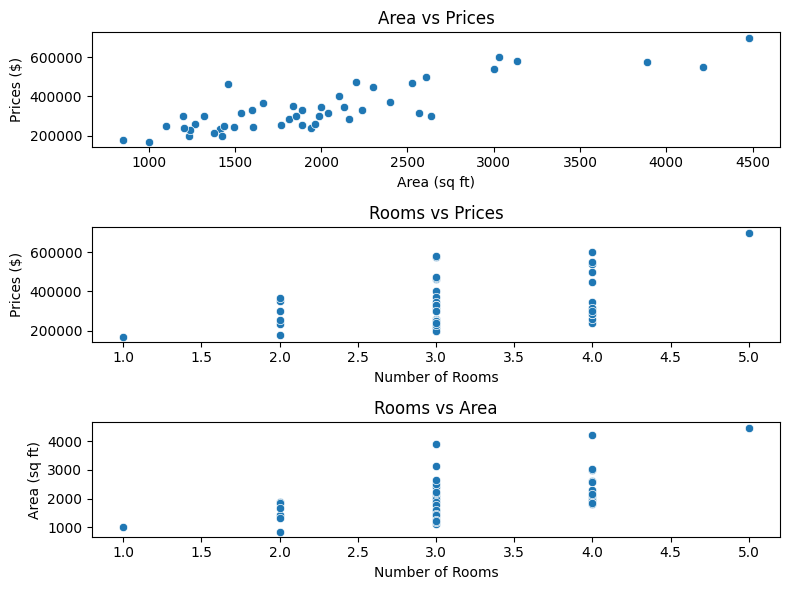

In [8]:
# 6.	Visualize the Data

plt.figure(figsize=(8, 6))

plt.subplot(3, 1, 1)
sns.scatterplot(x='Area', y='Prices', data=dataset,palette='viridis')
plt.title('Area vs Prices')
plt.xlabel('Area (sq ft)')
plt.ylabel('Prices ($)')

plt.subplot(3, 1, 2)
sns.scatterplot(x='Rooms', y='Prices', data=dataset, palette='viridis')
plt.title('Rooms vs Prices')
plt.xlabel('Number of Rooms')
plt.ylabel('Prices ($)')

plt.subplot(3, 1, 3)
sns.scatterplot(x='Rooms', y='Area', data=dataset, palette='viridis')
plt.title('Rooms vs Area')
plt.xlabel('Number of Rooms')
plt.ylabel('Area (sq ft)')

plt.tight_layout()
plt.show()


In [9]:
# 7.	Separate the feature and prediction value columns

area = dataset.iloc[:,0].values
room = dataset.iloc[:,1].values
price = dataset.iloc[:,2].values

In [10]:
# 8.	Write the Hypothesis Function

def Hypothesis(theta_array , x1 , x2) :
  return theta_array[0] + theta_array[1]*x1 + theta_array[2]*x2

In [11]:
# 9.	Write the Cost Function

def  Cost_Function(theta_array,x1,x2,y , m):
  total_cost = 0
  for i in range(m):
    total_cost += (Hypothesis(theta_array,x1[i] , x2[i]) - y[i])**2
  return total_cost/(2*m)

In [12]:
# 10.	Write the Gradient Descent optimization algorithm

def Gradient_Descent(theta_array , x1, x2, y , m ,alpha) :
  summation_0 = 0
  summation_1 = 0
  summation_2 = 0

  for i in range(m):
    summation_0 += (Hypothesis(theta_array,x1[i] , x2[i]) - y[i])
    summation_1 += ((Hypothesis(theta_array,x1[i] , x2[i]) - y[i])*x1[i])
    summation_2 += ((Hypothesis(theta_array,x1[i] , x2[i]) - y[i])*x2[i])
  new_theta0 = theta_array[0] - (alpha/m)*summation_0
  new_theta1 = theta_array[1] - (alpha/m)*summation_1
  new_theta2 = theta_array[2] - (alpha/m)*summation_2

  new_theta = [new_theta0 , new_theta1 , new_theta2]

  return new_theta

In [13]:
# 11.	Apply the training over the dataset to minimize the loss

def Training(x1, x2, y, alpha, epochs):
    theta_0 = 0
    theta_1 = 0
    theta_2 = 0
    theta_array = [theta_0, theta_1  ,theta_2]
    m = len(x1)
    cost_values = []

    for i in range(epochs):
        theta_array = Gradient_Descent(theta_array, x1  ,x2, y, m, alpha)
        loss = Cost_Function(theta_array, x1  ,x2, y, m)
        cost_values.append(loss)
        y_new = theta_array[0] + theta_array[1]*x1 + theta_array[2]*x2

    return theta_array , cost_values

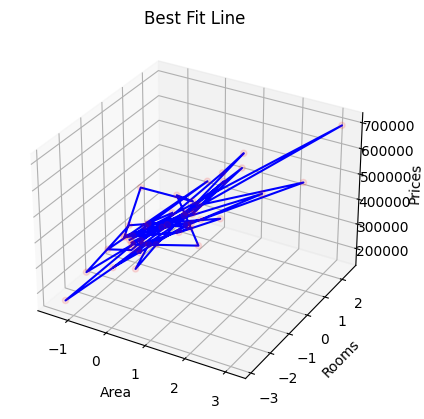

In [14]:
# 12.	Find the best fit line to the given dataset

alpha = 0.01
epochs = 500
area_norm = X1_norm
room_norm =  X2_norm
price_norm = Y
theta_array , cost_per_itr = Training(area_norm, room_norm, price_norm, alpha, epochs)
predicred_price = theta_array[0] + theta_array[1]*area_norm + theta_array[2]*room_norm
ax = plt.axes(projection="3d")
ax.scatter(area_norm, room_norm, price_norm, alpha=0.1, c='#FF0000')
ax.plot(area_norm , room_norm , price_norm , c = "#0000FF")
ax.set_xlabel("Area")
ax.set_ylabel("Rooms")
ax.set_zlabel("Prices")
ax.set_title("Best Fit Line")
plt.show()

Predicred Price = [338175.98396731] + [103032.12432974] * Area(Normalized) + [-202.3252331]*Rooms(Normalized)


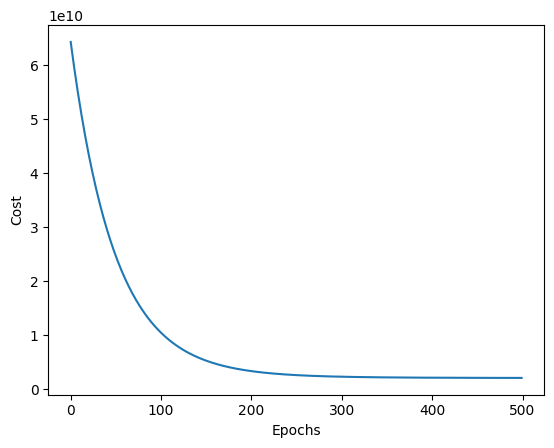

In [15]:
# 13.	Observe the cost function vs iterations learning curve

print(f"Predicred Price = {theta_array[0]} + {theta_array[1]} * Area(Normalized) + {theta_array[2]}*Rooms(Normalized)")
x = np.arange(0, epochs)
plt.plot(x, cost_per_itr)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

In [19]:
# Statistics After Normalization

Normalized_data = pd.DataFrame()
Normalized_data["Area"] = X1_norm.flatten()
Normalized_data["Rooms"] = X2_norm.flatten()
Normalized_data['Price'] = Y.flatten()
Normalized_data.describe()

,Area,Rooms,Price
count,4.700000e+01,4.700000e+01,47.000000
mean,9.448707e-18,2.710598e-16,340412.659574
std,1.010811e+00,1.010811e+00,125039.899586
min,-1.461049e+00,-2.882690e+00,169900.000000
25%,-7.233261e-01,-2.260934e-01,249900.000000
50%,-1.433229e-01,-2.260934e-01,299900.000000
75%,3.412850e-01,1.102205e+00,384450.000000
max,3.150993e+00,2.430504e+00,699900.000000


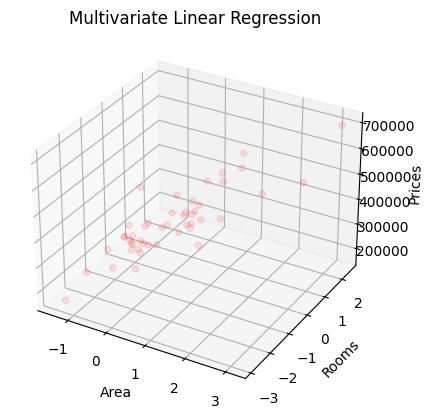

In [21]:
# Datapoints scattering (without best fit line)

ax = plt.axes(projection="3d")
ax.scatter(area_norm, room_norm, price_norm, alpha=0.1, c='#FF0000')
ax.set_xlabel("Area")
ax.set_ylabel("Rooms")
ax.set_zlabel("Prices")
ax.set_title("Multivariate Linear Regression")
plt.show()